# BS Score over time

The primary goal of this notebook is to visualize the BS score over time under various groupings and conditions

Additionally, some of the processed datasets will be saved to disk for later use.

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

### Load the BS score with normalized timeline

In [4]:
normed_bs_df = pd.read_excel('../data/bs_normed_full.xls', index_col=0)
normed_bs_df.head()

,BS,norm_years
patient_id,,
40,2.96,0
40,3.00,1
40,3.20,2
40,3.10,3
40,3.40,4


### Load the BS score data aggregated for each year in normalized timeline

In [5]:
agg_bs_df = pd.read_excel('../data/bs_normed_agg.xls', index_col=0, header=[0,1])
agg_bs_df.head()

BS       count
            mean   std   len
norm_years                  
0           3.40  1.98   910
1           3.32  1.99   766
2           3.39  1.99   738
3           3.42  2.00   716
4           3.47  2.02   696

### Plot the BS score over time with number of patients

The top graph shows the average BS score taken over all patients for their 1st, 2nd, 3rd etc year in the study.

For example, if patient A started in May 1998 and patient B started in June 2007 then the BS score of patient A in 1998 will be averaged with the BS score of patient B in 2007 for the year 0 in graph below, as 1998 and 2007 were the respective "0th" year in the study.

If either patient had more than 1 measurement in their first year in the study, these measurements are averaged for that year to attain a single score per year in study, per patient.

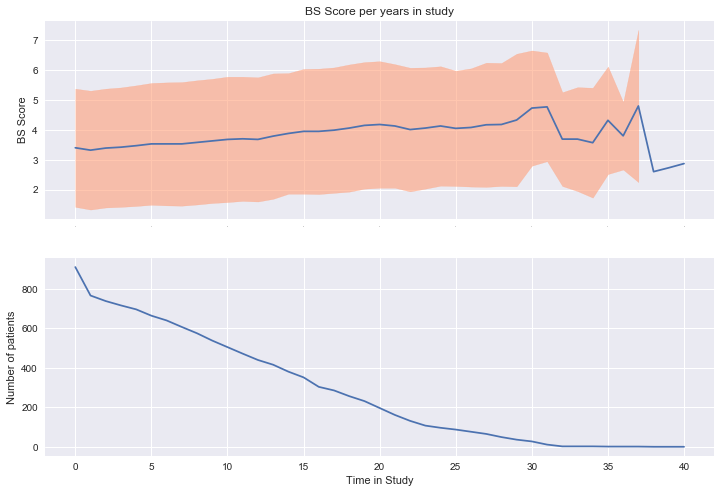

Number of patients in study at year 0 vs year 30 = 910 / 28


In [6]:
std_bs = agg_bs_df['BS', 'std']
mean_bs = agg_bs_df['BS','mean']
num_patients = agg_bs_df['count','len']

def plot_bs_over_time(mean_bs, std_bs, num_patients):
    fig = plt.figure(figsize=(12,8))
    ax1 = plt.subplot(211)
    plt.plot(mean_bs)
    plt.fill_between(mean_bs.index, y1=mean_bs+std_bs, y2=mean_bs-std_bs, color='lightsalmon', alpha=0.6)
    plt.setp(ax1.get_xticklabels(), fontsize=0)
    plt.title('BS Score per years in study')
    ax1.set_ylabel('BS Score')

    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(num_patients)
    ax2.set_xlabel('Time in Study')
    ax2.set_ylabel('Number of patients')

    plt.show()
    
plot_bs_over_time(mean_bs, std_bs, num_patients)

print(f'Number of patients in study at year 0 vs year 30 = {num_patients.loc[0]} / {num_patients.loc[30]}',)

#### Interpretation

Firstly, we can observe a approximately linear increase in BS score as time in study increases, while the number of patients in study also decreases approximately linearly. These observations are in line with what we expected.

Secondly, we can see that at around the 30 year mark there are very few patients in the study (28 vs 910 at start), which shows corresponding erratic measurements

We can see a high variability in the average BS score per year in study. This could be motivated by the fact that we are taking an average over patients that are in different phases of disease progression. For example, patient A might join the study with a BS score of 2 and patient B might join with a BS score of 4.2 - vastly different stages in disease progression, but both will be considered in the calculation of the mean BS score for `year-in-study = 0`.

Also, at the last few datapoints we only have 1 patient in the study, and thus the standard deviation is not defined. 

## Repeat the above analysis for both males and females

The first step is to identify which patients are male and female.

In [7]:
demo_df = pd.read_excel('../data/demographics and Biologics data.xlsx')

# Get patient ids of males and females
genders = demo_df['patient_gender_id'].values

# Get male and female index
male_ids = demo_df[genders == 'Male']['patient_id']
female_ids = demo_df[genders == 'Female']['patient_id']

# # Get BS dataset of males and females
male_bs_df = normed_bs_df.loc[male_ids]
female_bs_df = normed.loc[female_ids]

## Plot BS score over time for males

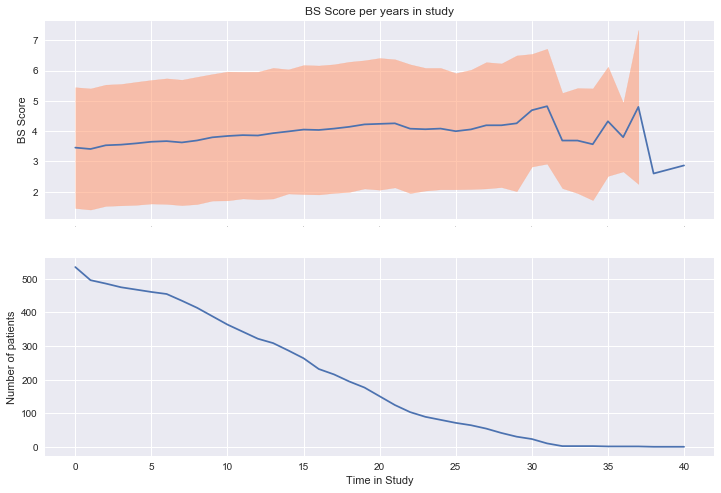

In [47]:
agg_male_df = (male_bs_df.groupby('norm_years')
                    .agg({'BS': ['mean','std'], 'norm_years': len})
                    .rename(columns={'norm_years': 'count'}))

std_bs = agg_male_df['BS', 'std']
mean_bs = agg_male_df['BS','mean']
num_patients = agg_male_df['count','len']

plot_bs_over_time(mean_bs, std_bs, num_patients)

## Plot BS over time for females

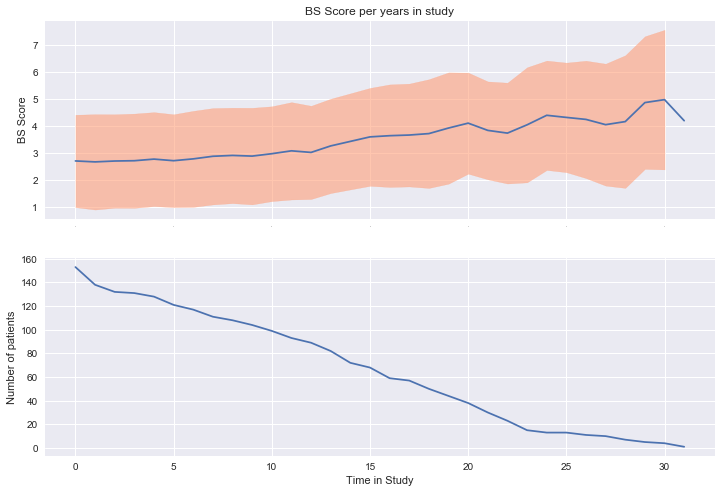

In [49]:
agg_female_df = (female_bs_df.groupby('norm_years')
                    .agg({'BS': ['mean','std'], 'norm_years': len})
                    .rename(columns={'norm_years': 'count'}))

std_bs = agg_female_df['BS', 'std']
mean_bs = agg_female_df['BS','mean']
num_patients = agg_female_df['count','len']

plot_bs_over_time(mean_bs, std_bs, num_patients)